In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

re = 'Raw_Economic'
ra = 'Raw_Authority'
def label_color (row):
    if row[re] < 0 and row[ra] > 0:
        return 'red'
    if row[re] > 0 and row[ra] > 0:
        return 'blue'
    if row[re] < 0 and row[ra] < 0:
        return 'green'
    if row[re] > 0 and row[ra] < 0:
        return 'purple'
    else:
        return 'black'



political_data = pd.read_csv("political_revolution.csv")
political_data['Color'] = political_data.apply(lambda row: label_color(row), axis = 1)

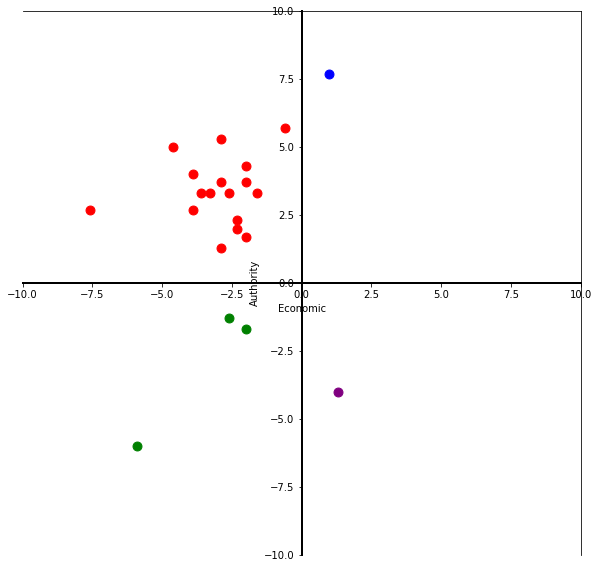

In [3]:
x = political_data["Raw_Economic"]
y = political_data["Raw_Authority"]
top_left = political_data.loc[(x < 0) & (y > 0)]
top_right = political_data.loc[(x > 0) & (y > 0)]
bottom_left = political_data.loc[(x < 0) & (y < 0)]
bottom_right = political_data.loc[(x > 0) & (y < 0)]
top_left

fig = plt.figure(figsize = (10, 10))
subfig = fig.add_subplot()
plt.scatter(top_left["Raw_Economic"], top_left["Raw_Authority"], c = "red", s = 80)
plt.scatter(top_right["Raw_Economic"], top_right["Raw_Authority"], c = "blue", s = 80)
plt.scatter(bottom_left["Raw_Economic"], bottom_left["Raw_Authority"], c = "green", s = 80)
plt.scatter(bottom_right["Raw_Economic"], bottom_right["Raw_Authority"], c = "purple", s = 80)
subfig.spines['left'].set_position('zero')
subfig.spines['left'].set_linewidth(2)
subfig.spines['left'].set_color('black')
subfig.spines['bottom'].set_position('zero')
subfig.spines['bottom'].set_linewidth(2)
subfig.spines['bottom'].set_color('black')
plt.ylim(-10, 10)
plt.xlim(-10, 10)


plt.xlabel("Economic")
plt.ylabel("Authority")
plt.draw()


In [5]:
color_map = {
    "blue": "#6390F0",
    "green": "#7AC74C",
    "red": "#F5655F",
    "purple": "#A33EA1",
    "black": "#555555"
} 

# plotlyFig = px.scatter(political_data, x="Raw_Economic", y="Raw_Authority", 
#                        color="Color", color_discrete_map=color_map, 
#                        hover_name="Name", hover_data={"Color": False, "Raw_Progressive": True})
plotlyFig = px.scatter(political_data, x="Raw_Economic", y="Raw_Authority", 
                       color="Raw_Progressive", 
                       hover_name="Name", hover_data={"Color": False, "Raw_Progressive": True}, 
                       labels = {"Raw_Progressive":"Progressive"}, range_color=[-14, 14], text="Name")
plotlyFig.update_traces(marker=dict(size=12), textposition='top center')
plotlyFig.update_xaxes(range=[-10, 10],zeroline=True, zerolinewidth=2, zerolinecolor='Black', nticks=20)
plotlyFig.update_yaxes(range=[-10, 10], zeroline=True, zerolinewidth=2, zerolinecolor='Black', nticks=20)

plotlyFig.update_layout(
    autosize=False,
    width=1200,
    height=1200,
    xaxis_title = 'Economic', 
    yaxis_title = 'Authority',
    showlegend = False
)
plotlyFig.show()

# boxFig = px.box(political_data, y="Raw_Progressive", points="all", x="Color", color="Color", color_discrete_map=color_map, 
#                        hover_name="Name")
# boxFig.update_layout(
#     autosize=False,
#     width=800,
#     height=800,
#     yaxis_title = 'Progressive',
#     showlegend = False
# )
# boxFig.show()